# Importation des bibliothèques nécéssaires : 

In [7]:
import numpy as np
from numpy import linalg as la
from numpy import zeros,meshgrid, linspace
from math import sin, pi, cos, sqrt, exp 
import pandas as pd
import matplotlib.pyplot as plt
import cmath
from scipy import sparse

# 1- Représentation partimonieuse dans un dictionnaire orthonormal

## Q2- Génération de signal de taille N=500

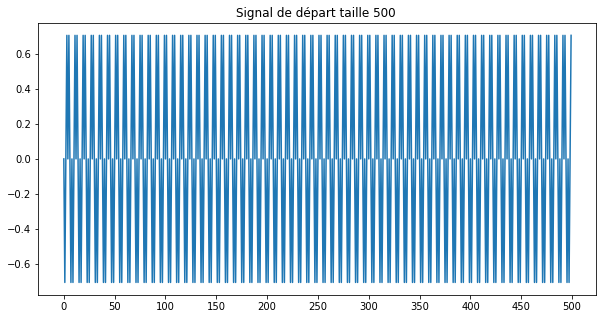

In [8]:
def init_signal(N): 
  ## Fréquence d'échantillonage 
  fe=400
  ## Axe de temps
  t=[i/fe for i in range(0,N)]
  f0=50
  ## génération de sinus 
  sinus=[sin(2*pi*f0*t)for t in t]
  fp=100
  ##Génération de la porteuse 
  tporteuse = [i/fe for i in range(1, len(sinus)+1)]
  porteuse = [cos(2 * pi * fp * tporteuse) for tporteuse in tporteuse]
  x = np.array([sinus[i] * porteuse[i] for i in range(len(sinus))])
  return x

X_init=init_signal(500)
#___Graphique : 
fig = plt.figure(1, figsize=(10,5))
plt.title("Signal de départ taille 500 ")
plt.xticks(np.arange(0, 600,50))
plt.plot(X_init)
plt.show()

### Initialisation des base DCT et DFT : 

In [9]:
## Base de la transformation en consinus discret  DCT: 
def Discret_consinus_Transorm(N):
    ## initialiser la base  
  C=zeros((N,N))
  for i in range(0,N):
    C[i][0]=1/sqrt(N)
  for i in range(0,N):
    for j in range(1,N):
      C[i][j] = (sqrt(2/N))*cos(((2*i+1)/(2*N))*pi*j)
  return C

## Base de la transformation de Fourrier discrète DFT: 
def Discrete_Fourier_Transform(N):
  i, j = np.meshgrid(np.arange(N), np.arange(N))
  omega = np.exp( (-2 * pi * 1J) / N )
  F = np.power( omega, i * j ) / sqrt(N)
  return F

In [10]:
print("-------------Compte tenu de la gestion des nombre complexe sur Python et de la rapaditié du caclul de l'inverse de la matrice DFT\n nous avons opté par le passage à l'inverse plutôt que de passer par la transposé de la matrice F ce qui nous a permis de réduire considérablement l'erreur 10^-13 contre 22 ")
np.round(la.inv(Discrete_Fourier_Transform(4))-np.transpose(Discrete_Fourier_Transform(4)),10)

-------------Compte tenu de la gestion des nombre complexe sur Python et de la rapaditié du caclul de l'inverse de la matrice DFT
 nous avons opté par le passage à l'inverse plutôt que de passer par la transposé de la matrice F ce qui nous a permis de réduire considérablement l'erreur 10^-13 contre 22 


array([[-0.+0.j,  0.+0.j,  0.+0.j, -0.-0.j],
       [ 0.-0.j,  0.+1.j,  0.+0.j, -0.-1.j],
       [-0.-0.j,  0.+0.j,  0.-0.j,  0.+0.j],
       [ 0.-0.j, -0.-1.j, -0.+0.j, -0.+1.j]])

### Fonction de la représentation parcimonieuse dans les base C et F 

In [11]:
def representation_parcimonieuse_du_signal(N,x_signal,base):
  ## initialiser le dictionnaire selon la base choisie:
  if base =="C":
    D=Discret_consinus_Transorm(N)
  elif base=="F":
    D=Discrete_Fourier_Transform(N)
  else:
    print(f"la base donnée en paramètre --{base}-- n'est définie veuillez définir la base")
    
  ##transposé du dictionnaire :
  C_transpose=np.transpose(D)
  ##__Calcul du Alpha
  if base=="F":
    Alpha=np.dot(la.inv(D),x_signal)
  else:
    Alpha=np.dot(C_transpose,x_signal)
  
  ###Décompression du signal avec Alpha  et C : 
  x_decompress=np.dot(D,Alpha)

  ##__ Calcul de l'erreur:
  Erreur=la.norm(x_signal-x_decompress)

  return D,C_transpose,Alpha, x_decompress, Erreur

### a/ Représentation parcimonieuse du signal de départ dans la base C 

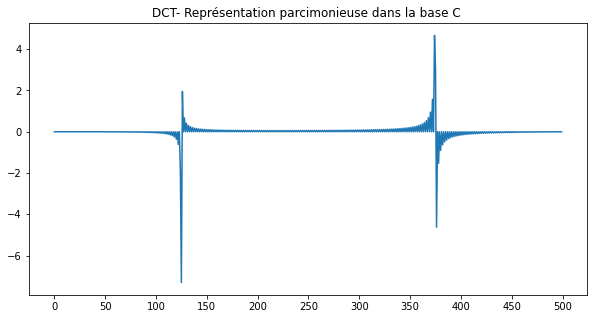

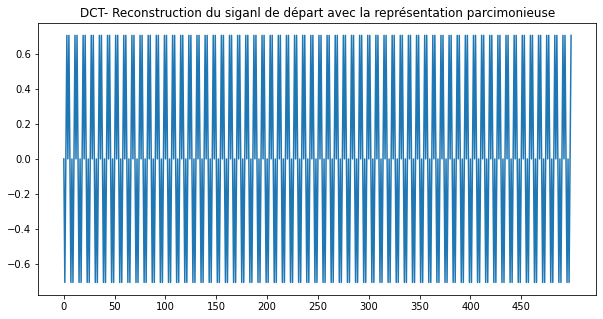

L'erreur est de :  4.68465671917625e-13


In [12]:
D, C_transpose,Alpha_C, x_decompress, Erreur= representation_parcimonieuse_du_signal(500,X_init,"C")

###  Représentation Graphique
fig = plt.figure(1, figsize=(10,5))
plt.title("DCT- Représentation parcimonieuse dans la base C ")
plt.xticks(np.arange(0, 600,50))
plt.plot(Alpha_C)
plt.show()
## Reconstruction du signal 
fig = plt.figure(1, figsize=(10,5))
plt.title("DCT- Reconstruction du siganl de départ avec la représentation parcimonieuse")
plt.xticks(np.arange(0, 500,50))
plt.plot(x_decompress)
plt.show()

##Calcul d'erreur 
print("L'erreur est de : ", Erreur)

### b/ Représentation parcimoninieuse du signal dans la base F 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


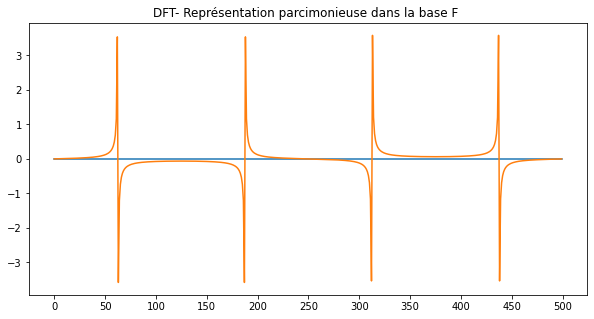

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


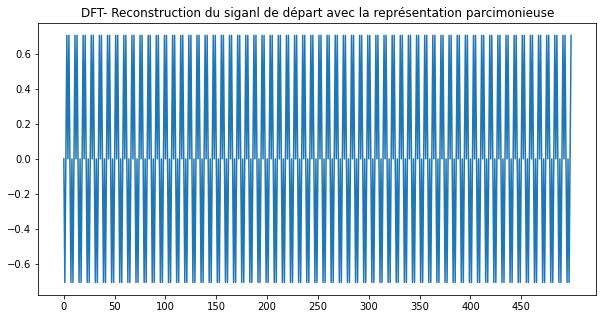

L'erreur est de :  9.744950921716722e-14


In [13]:
D, C_transpose,Alpha_F, x_decompress, Erreur= representation_parcimonieuse_du_signal(500,X_init,"F")

###  Représentation Graphique
fig = plt.figure(1, figsize=(10,5))
plt.title("DFT- Représentation parcimonieuse dans la base F ")
plt.xticks(np.arange(0, 600,50))
plt.plot(Alpha_F)
plt.plot(np.imag(Alpha_F))
plt.show()
## Reconstruction du signal 
fig = plt.figure(1, figsize=(10,5))
plt.title("DFT- Reconstruction du siganl de départ avec la représentation parcimonieuse")
plt.xticks(np.arange(0, 500,50))
plt.plot(x_decompress)
plt.show()
##Calcul d'erreur 
print("L'erreur est de : ", Erreur)

## Q3- Représentation parcimonieuse du signal X avec OMP: 

### Définition de l'algorithme orthogonal Matching Pursuit

In [14]:
def Orthogonal_Matching_Pursuit(D, X, epsilon=10**-3, k_max=10): 
  n,m=D.shape 
  R=X.copy()
  P=[]
  alpha=np.zeros(m)
  #phi=np.zeros((n,m))
  k=0
  while (np.linalg.norm(R)>=epsilon) and (k<k_max):
    ##Pour calculer mi :
    z_optimal = [abs(np.dot(D[:,j],R))/np.linalg.norm(D[:,j]) for j in range(m)]
    ## Indice de la valeur du maximum de la liste z_optimal
    mi = z_optimal.index(max(z_optimal))
    P.append(mi)
    phi = D[:,P]
    alpha[P]=np.dot(np.linalg.pinv(phi), X)
    R=X-np.dot(D,alpha)
    k+=1
  return phi, P, R, alpha, k

### a/Représentation partimonieuse dans la base C avec OMP: 

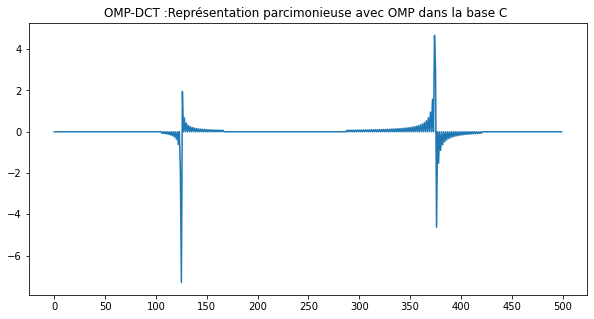

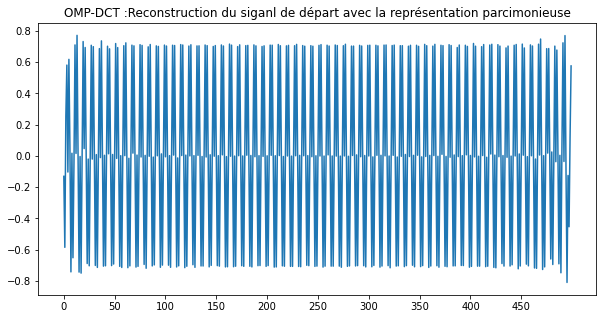

L'erreur est de :0.572993
 Nous remarquons une erreur très suppérieur par rapportà la méthode de la question 2.
Ce qui est normal car dans OMP on n'utilise que la pseudo norme pour approximer l'inverse
de la matrice du dictionnaire alors que notre matrice est déjà orthogonal et sa transposée est son inverse


In [15]:
phi, P, R, alpha_C, k= Orthogonal_Matching_Pursuit(Discret_consinus_Transorm(500),X_init,k_max=100)
###  Représentation Graphique
fig = plt.figure(1, figsize=(10,5))
plt.title("OMP-DCT :Représentation parcimonieuse avec OMP dans la base C ")
plt.xticks(np.arange(0, 600,50))
plt.plot(alpha_C)
plt.show()
## Reconstruction du signal 
fig = plt.figure(1, figsize=(10,5))
plt.title("OMP-DCT :Reconstruction du siganl de départ avec la représentation parcimonieuse")
plt.xticks(np.arange(0, 500,50))
plt.plot(np.dot(Discret_consinus_Transorm(500),alpha_C))
plt.show()

## Caclul de l'erreur : 
Erreur=la.norm(X_init-np.dot(Discret_consinus_Transorm(500),alpha_C))
print(f"L'erreur est de :{round(Erreur,6)}\n Nous remarquons une erreur très suppérieur par rapportà la méthode de la question 2.\nCe qui est normal car dans OMP on n'utilise que la pseudo norme pour approximer l'inverse\nde la matrice du dictionnaire alors que notre matrice est déjà orthogonal et sa transposée est son inverse")

### b/ Représentation partimonieuse avec OMP dans la base F: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


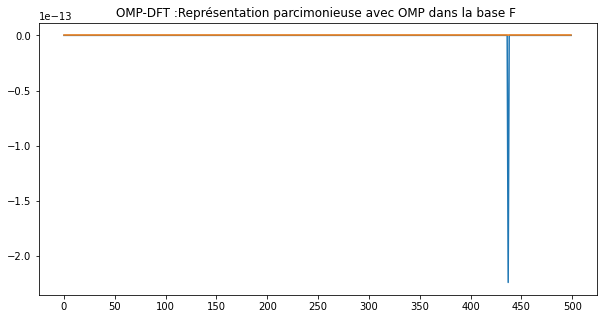

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


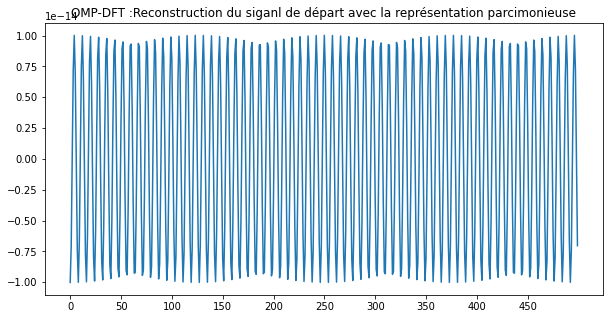

L'erreur est de :11.18034


In [16]:
phi_1, P_1, R_1, alpha_F, k_1= Orthogonal_Matching_Pursuit(Discrete_Fourier_Transform(500),X_init,k_max=10)
###  Représentation Graphique
fig = plt.figure(1, figsize=(10,5))
plt.title("OMP-DFT :Représentation parcimonieuse avec OMP dans la base F ")
plt.xticks(np.arange(0, 600,50))
plt.plot(alpha_F)
plt.plot(np.imag(alpha_F))
plt.show()

## Reconstruction du signal 
fig = plt.figure(1, figsize=(10,5))
plt.title("OMP-DFT :Reconstruction du siganl de départ avec la représentation parcimonieuse")
plt.xticks(np.arange(0, 500,50))
plt.plot(np.dot(Discrete_Fourier_Transform(500),alpha_F))
plt.show()
## Caclul de l'erreur : 
Erreur=la.norm(X_init-np.dot(Discrete_Fourier_Transform(500),alpha_F))
print(f"L'erreur est de :{round(Erreur,6)}")

### c/ La norme de la différence entre les deux représentations parcimonieuses dans la base C et F avec OMP et sans OMP: 

In [17]:
print("Norme de la différence sans l'utilisation d'OMP :\n\n", la.norm(Alpha_C-Alpha_F))
print("\nNorme de la différence avec OMP :\n\n", la.norm(alpha_C-alpha_F))

Norme de la différence sans l'utilisation d'OMP :

 15.811388300846119

Norme de la différence avec OMP :

 11.165647283280794


## Q4- même procédé avec un signal de taille N=100 :

******************************************************************************
                              Signal de départ                                
*******************************************************************************



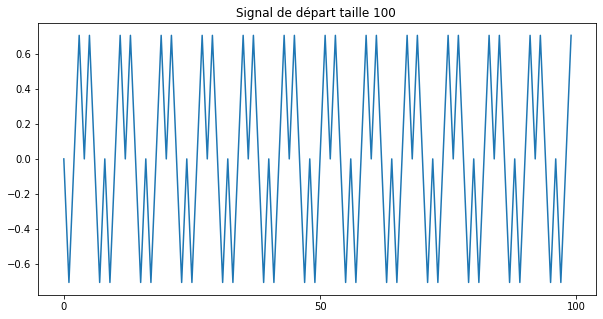


*********************************************************************
                               DCT                                     
************************************************************************


**********************************************************************
                               Sans OMP                                  
************************************************************************



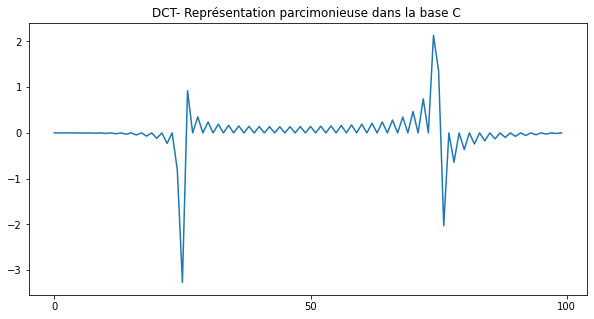

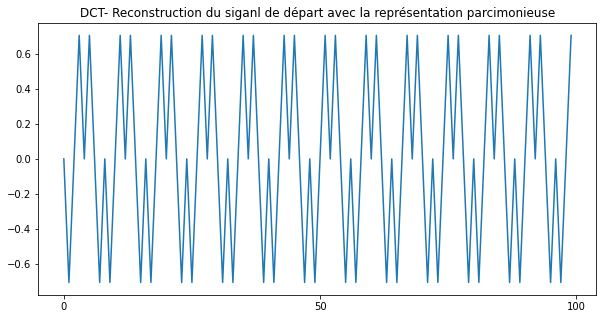

L'erreur est de :  5.520913020245092e-14

**********************************************************************************
                              Avec OMP                                                  
**************************************************************************************



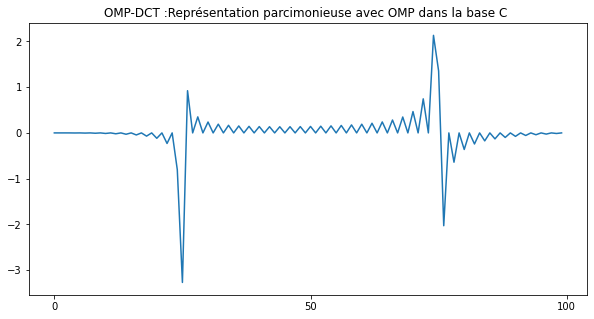

L'erreur est de :0.0003975947294622679


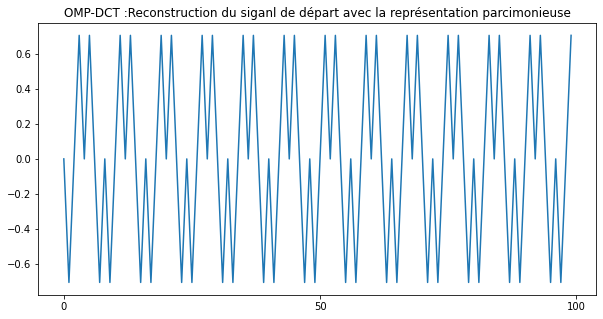


******************************************************************
                               DFT                                
******************************************************************


**********************************************************************
                               Sans OMP                                    
***********************************************************************



/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


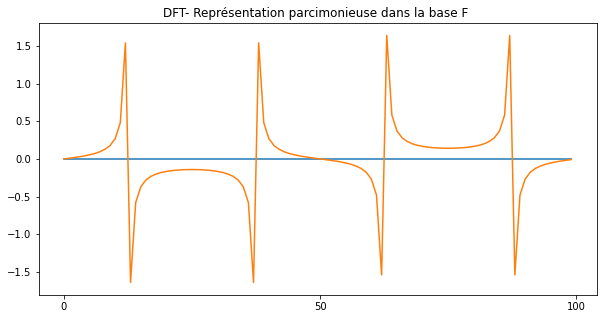

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


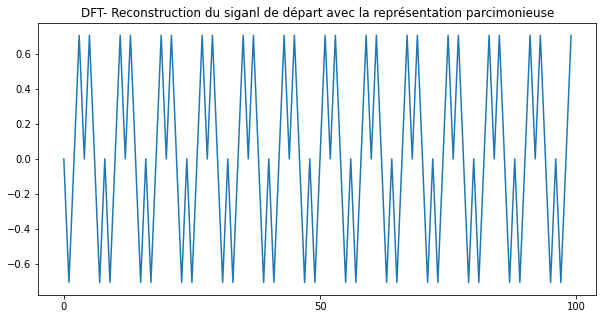

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


L'erreur est de :  1.0716232015731503e-14

**********************************************************************
                               Avec OMP                                    
***********************************************************************



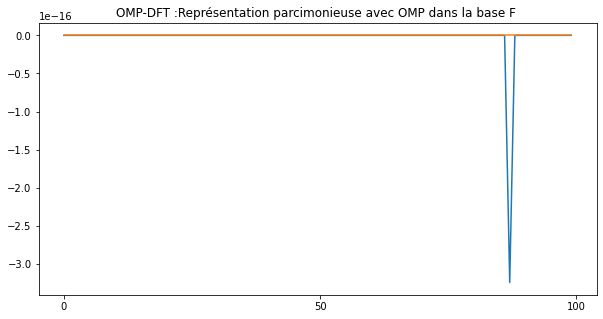

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


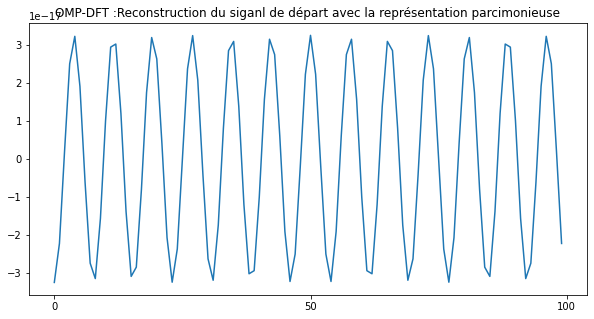

L'erreur est de :4.999999999999999


In [18]:
print("******************************************************************************")
print("                              Signal de départ                                ")
print("*******************************************************************************\n")
#___Graphique : 
fig = plt.figure(1, figsize=(10,5))
plt.title("Signal de départ taille 100 ")
plt.xticks(np.arange(0, 600,50))
plt.plot(init_signal(100))
plt.show()
### DCT 
print("\n*********************************************************************")
print("                               DCT                                     ")
print("************************************************************************\n")
### Sans OMP 
print("\n**********************************************************************")
print("                               Sans OMP                                  ")
print("************************************************************************\n")
D, C_transpose,Alpha_C, x_decompress, Erreur= representation_parcimonieuse_du_signal(100,init_signal(100),"C")

###  Représentation Graphique
fig = plt.figure(1, figsize=(10,5))
plt.title("DCT- Représentation parcimonieuse dans la base C ")
plt.xticks(np.arange(0, 600,50))
plt.plot(Alpha_C)
plt.show()
## Reconstruction du signal 
fig = plt.figure(1, figsize=(10,5))
plt.title("DCT- Reconstruction du siganl de départ avec la représentation parcimonieuse")
plt.xticks(np.arange(0, 500,50))
plt.plot(x_decompress)
plt.show()

##Calcul d'erreur 
print("L'erreur est de : ", Erreur)

### Avec OMP 
print("\n**********************************************************************************")
print("                              Avec OMP                                                  ")
print("**************************************************************************************\n")

phi, P, R, alpha, k= Orthogonal_Matching_Pursuit(Discret_consinus_Transorm(100),init_signal(100),k_max=100)
###  Représentation Graphique
fig = plt.figure(1, figsize=(10,5))
plt.title("OMP-DCT :Représentation parcimonieuse avec OMP dans la base C ")
plt.xticks(np.arange(0, 600,50))
plt.plot(alpha)
plt.show()
## Caclul de l'erreur : 
Erreur=la.norm(init_signal(100)-np.dot(Discret_consinus_Transorm(100),alpha))
print(f"L'erreur est de :{Erreur}")

## Reconstruction du signal 
fig = plt.figure(1, figsize=(10,5))
plt.title("OMP-DCT :Reconstruction du siganl de départ avec la représentation parcimonieuse")
plt.xticks(np.arange(0, 500,50))
plt.plot(np.dot(Discret_consinus_Transorm(100),alpha))
plt.show()

####DFT 
print("\n******************************************************************")
print("                               DFT                                ")
print("******************************************************************\n")

###Sans OMP 
print("\n**********************************************************************")
print("                               Sans OMP                                    ")
print("***********************************************************************\n")
D, C_transpose,Alpha_F, x_decompress, Erreur= representation_parcimonieuse_du_signal(100,init_signal(100),"F")

###  Représentation Graphique
fig = plt.figure(1, figsize=(10,5))
plt.title("DFT- Représentation parcimonieuse dans la base F ")
plt.xticks(np.arange(0, 600,50))
plt.plot(Alpha_F)
plt.plot(np.imag(Alpha_F))
plt.show()

## Reconstruction du signal 
fig = plt.figure(1, figsize=(10,5))
plt.title("DFT- Reconstruction du siganl de départ avec la représentation parcimonieuse")
plt.xticks(np.arange(0, 500,50))
plt.plot(x_decompress)
plt.show()
##Calcul d'erreur 
print("L'erreur est de : ", Erreur)

### Avec OMP 
print("\n**********************************************************************")
print("                               Avec OMP                                    ")
print("***********************************************************************\n")
phi_1, P_1, R_1, alpha_1, k_1= Orthogonal_Matching_Pursuit(Discrete_Fourier_Transform(100),init_signal(100),k_max=100)
###  Représentation Graphique
fig = plt.figure(1, figsize=(10,5))
plt.title("OMP-DFT :Représentation parcimonieuse avec OMP dans la base F ")
plt.xticks(np.arange(0, 600,50))
plt.plot(alpha_1)
plt.plot(np.imag(alpha_1))
plt.show()

## Reconstruction du signal 
fig = plt.figure(1, figsize=(10,5))
plt.title("OMP-DFT :Reconstruction du siganl de départ avec la représentation parcimonieuse")
plt.xticks(np.arange(0, 500,50))
plt.plot(np.dot(Discrete_Fourier_Transform(100),alpha_1))
plt.show()
## Caclul de l'erreur : 
Erreur_1=la.norm(init_signal(100)-np.dot(Discrete_Fourier_Transform(100),alpha_1))
print(f"L'erreur est de :{Erreur_1}")

# 2- Un autre algorithme de représentation parcimonieuse (IRLS) 

### Initialisation de l'algorithme MP :

In [19]:
def Matching_Pursuit(D, X, epsilon=10**-3, k_max=10): 
  n,m=D.shape 
  R=X.copy()
  P=[]
  alpha=np.zeros(m)
  k=0
  while (np.linalg.norm(R)>=epsilon) and (k<k_max):
    ##Pour calculer mi :
    z_optimal = [abs(np.dot(D[:,j],R))/np.linalg.norm(D[:,j]) for j in range(m)]
    ## Indice de la valeur du maximum de la liste z_optimal
    mi = z_optimal.index(max(z_optimal))
    P.append(mi)
    dm = D[:,mi]
    zmi = (np.dot(R,dm))/(np.linalg.norm(dm)**2)
    alpha[mi]+=zmi
    R-=zmi*dm
    k+=1
  return P, R, alpha, k

###  implémentation IRLS 

In [20]:
# Algorithme IRLS
def IRLS(D,x,eps,kmax):
    #Initialisation
    p=0.9
    k=0
    D_transpose=np.transpose(D)
    D_pseudo_inv=np.linalg.pinv(np.dot(D,D_transpose))

    alpha = np.dot(np.dot(D_transpose,D_pseudo_inv),x)
    dim_alpha = len(alpha)
    W=np.identity(dim_alpha)
    for i in range(0,dim_alpha):
        W[i][i]=((np.abs(alpha[i]**2)+eps)**(p/2-1))
    Q=np.linalg.pinv(np.dot(np.transpose(W),W))
    while ((k<kmax) and (np.abs(np.linalg.norm(np.dot(np.dot(Q,np.dot(D_transpose,np.linalg.pinv(np.dot(D,np.dot(Q,D_transpose))))),x))-np.linalg.norm(alpha))>np.sqrt(eps)/100) and (eps>10**(-8))):
        if ((np.abs(np.linalg.norm(np.dot(np.dot(Q,np.dot(D_transpose,np.linalg.pinv(np.dot(D,np.dot(Q,D_transpose))))),x))-np.linalg.norm(alpha))<np.sqrt(eps)/100) and (eps>10**(-8))):
            eps/=10
        k=k+1   
        alpha = np.dot(np.dot(Q,np.dot(D_transpose,np.linalg.pinv(np.dot(D,np.dot(Q,D_transpose))))),x)
        for i in range(0,dim_alpha):
            W[i][i] = (np.abs(alpha[i]**2)+eps)**(p/2-1)
        Q=np.linalg.pinv(np.dot(np.transpose(W),W))
       
    return [alpha,W,k]

# 3- Aprrentissage d'un dictionnaire (k-SVD) 

## Q1_ Implémentation de l'algorithme K_SVD:

In [21]:
def KSVD_Algo(X,nb_atome,eps_OMP=10**-3,itermax=10):
  #__initialisation Dictionnaire avec les nb_atome première colonne de X :
  [obs,a]=(X.shape[0],nb_atome)
  D=X[:,0:a]

  ## Normalisation du dictionnaire : 
  for j in range(a):
    D[:,j]= D[:,j]/np.linalg.norm(D[:,j])
  count=0
  while count<itermax:
    #__intialisation matrice Lambda des représentation parcimonieuses :
    lambda_matrice=np.empty((a,X.shape[1]))
    for i in range(X.shape[1]):
      [phi, P, R, lambda_matrice[:,i], k]=Orthogonal_Matching_Pursuit(D,X[:,i],eps_OMP,k_max=itermax)
    D_init=D.copy()
    for i in range(a):
      Ei = X - np.dot(D,lambda_matrice) + np.dot(np.transpose(np.matrix(D[:,i])),np.matrix(lambda_matrice[i,:]))
      support = []
      for j in range(X.shape[1]):
        if lambda_matrice[i,j]!=0:
          support.append(j)
      if len(support)>0:
        Omega= np.zeros((X.shape[1],len(support)))
        for m in range(len(support)):
          Omega[support[m],m]=1
        Eir=np.dot(Ei,Omega)
        [U,S,V] = la.svd(Eir)
        D[:,i] = np.transpose(np.matrix(U[:,0]))
        lambda_matrice[i,support] = S[0]*np.transpose(V[:,0])
      else : 
        D[:,i] = np.random.random(X.shape[0])
        D[:,i] = D[:,i]/la.norm(D[:,i])
    count+=1
  return lambda_matrice,D,count


## Q2 Apprentissage d'un dictionnaire de 100 atomes sur les 108 signaux du fichier en partant avec K-SVD

In [22]:
##_Importation de l'ensemble de l'apprentissage:
excel_file = pd.ExcelFile("/content/drive/MyDrive/Ing2 /Compressive_sensing /DonneesProjet.xlsx")
data_train=pd.read_excel(excel_file,'dat').to_numpy()

##Application du K-SVD
X__train=data_train
X__train.shape
lambda_matrice, Dico, count=KSVD_Algo(X__train,nb_atome=100, itermax=10)
count

10

### Affichage 

In [23]:
print("Dimension des matrice X, D et Λ:")
X__train.shape, Dico.shape, lambda_matrice.shape

Dimension des matrice X, D et Λ:


((98, 108), (98, 100), (100, 108))

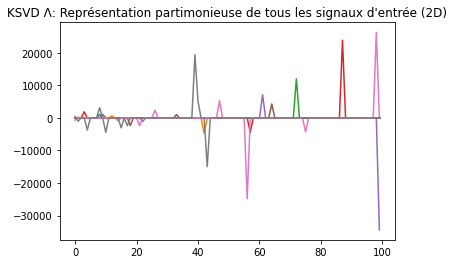

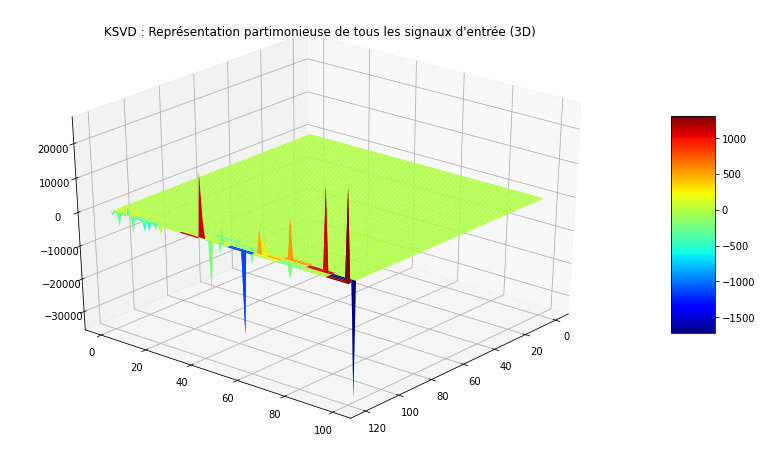

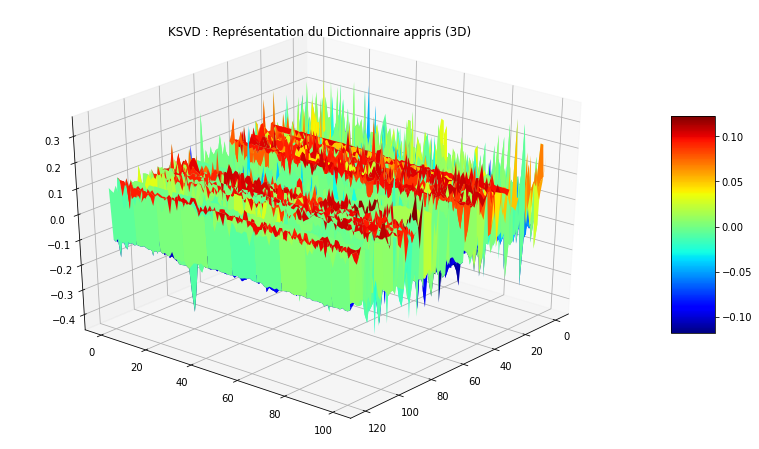

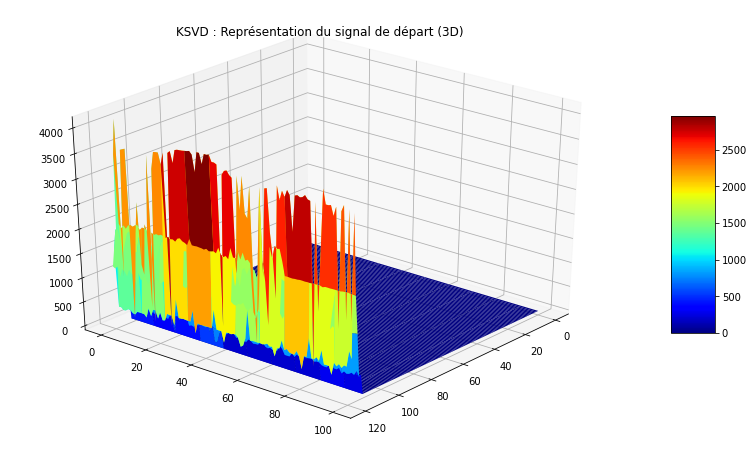

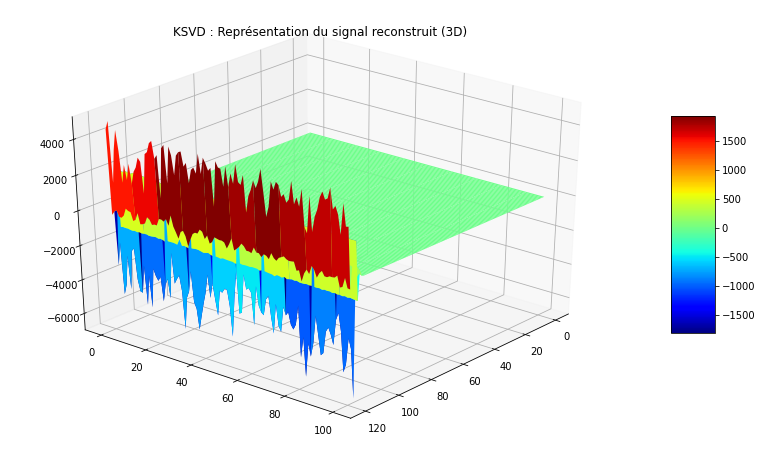

In [29]:
plt.title("KSVD Λ: Représentation partimonieuse de tous les signaux d'entrée (2D)")
plt.plot(lambda_matrice)
plt.show()
############## Réprésentation 3D :  
############ Représentation de la matrice Λ
X=linspace(0, 120, lambda_matrice.shape[1])
Y=linspace(0, 100, lambda_matrice.shape[0])
Surx,Surt=meshgrid(X,Y)

fig=plt.figure(figsize=(14,8))
ax = fig.gca(projection='3d')
surf=ax.plot_surface(Surx,Surt,lambda_matrice,cstride=1,linewidth=0, cmap='jet')
for angle in range(0, 360):
    ax.view_init(30, 40)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("KSVD : Représentation partimonieuse de tous les signaux d'entrée (3D)")
plt.show()
############ Représentation ddu dictionnaire 
X=linspace(0, 120, Dico.shape[1])
Y=linspace(0, 100, Dico.shape[0])
Surx,Surt=meshgrid(X,Y)

fig=plt.figure(figsize=(14,8))
ax = fig.gca(projection='3d')
surf=ax.plot_surface(Surx,Surt,Dico,cstride=1,linewidth=0, cmap='jet')
for angle in range(0, 360):
    ax.view_init(30, 40)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("KSVD : Représentation du Dictionnaire appris (3D)")
plt.show()

###
X=linspace(0, 120, X__train.shape[1])
Y=linspace(0, 100, X__train.shape[0])
Surx,Surt=meshgrid(X,Y)

fig=plt.figure(figsize=(14,8))
ax = fig.gca(projection='3d')
surf=ax.plot_surface(Surx,Surt,X__train,cstride=1,linewidth=0, cmap='jet')
for angle in range(0, 360):
    ax.view_init(30, 40)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("KSVD : Représentation du signal de départ (3D)")
plt.show()

###

X=linspace(0, 120, np.dot(Dico,lambda_matrice).shape[1])
Y=linspace(0, 100, np.dot(Dico,lambda_matrice).shape[0])
Surx,Surt=meshgrid(X,Y)

fig=plt.figure(figsize=(14,8))
ax = fig.gca(projection='3d')
surf=ax.plot_surface(Surx,Surt,np.dot(Dico,lambda_matrice),cstride=1,linewidth=0, cmap='jet')
for angle in range(0, 360):
    ax.view_init(30, 40)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title("KSVD : Représentation du signal reconstruit (3D)")
plt.show()

### Caclul de l'erreur après reconstruction des signaux X 

In [25]:
np.linalg.norm(X__train-np.dot(Dico,lambda_matrice))

79082.91688198148

## Q3 Evaluation de l'efficacité des 3 algorithme de représentation partimonieuse ( MP, OMP et IRLS)

******************************************************************
                              IRLS                                
******************************************************************

Signal 1 : 




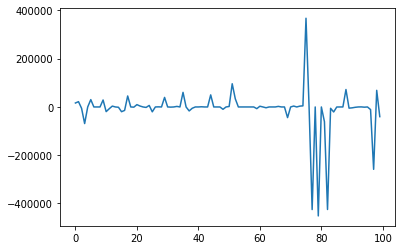


L'erreur de reconstruction est de :1377.2837024921323

Signal 2 : 




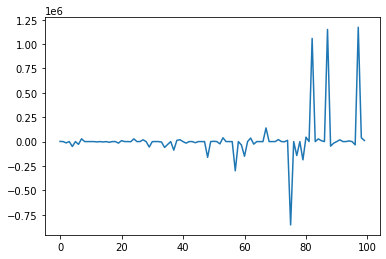


L'erreur de reconstruction est de :5182.515388907141

Signal 3 : 




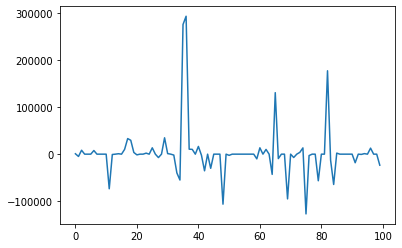


L'erreur de reconstruction est de :4182.225836899386

******************************************************************
                               OMP                                
******************************************************************

Signal 1 : 




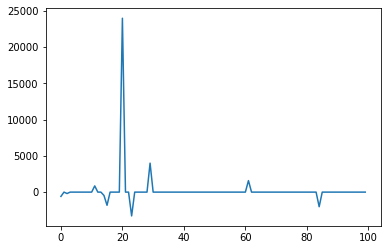


L'erreur de reconstruction est de :2476.0487675874315

Signal 2 : 




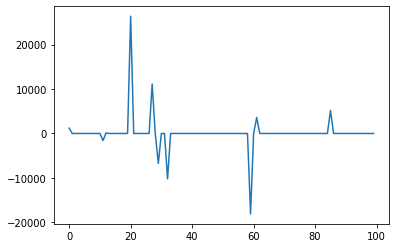


L'erreur de reconstruction est de :8102.813224046644

Signal 3 : 




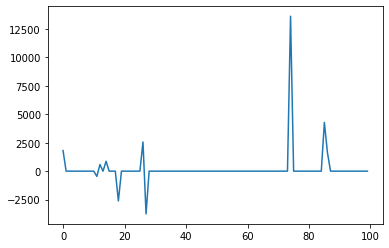


L'erreur de reconstruction est de :5321.227220332755

******************************************************************
                               MP                                 
******************************************************************

Signal 1 : 




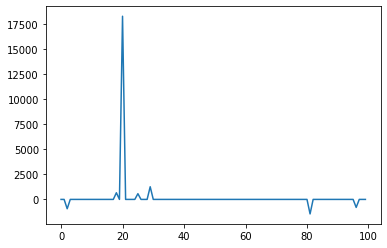


L'erreur de reconstruction est de :2813.3289647486954

Signal 2 : 




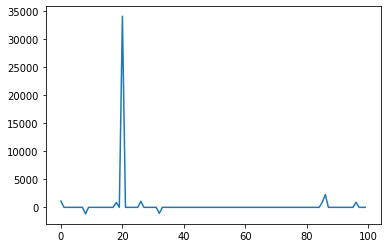


L'erreur de reconstruction est de :9180.407753941305

Signal 3 : 




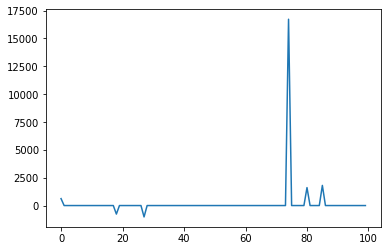


L'erreur de reconstruction est de :5573.1195195929395


In [27]:
data_test = pd.read_excel(excel_file, 'vecteurs pour valideer')
X_signals = data_test.to_numpy()

signal1 = X_signals[:,0]
signal2 = X_signals[:,1]
signal3 = X_signals[:,2]
eps_irls = 0.1

[Alpha1,w1,k1]=IRLS(Dico,signal1,eps_irls,100)
[Alpha2,w2,k2]=IRLS(Dico,signal2,eps_irls,100)
[Alpha3,w2,k2]=IRLS(Dico,signal3,eps_irls,100)
alpha1_IRLS = np.round(Alpha1,3)
alpha2_IRLS = np.round(Alpha2,3)
alpha3_IRLS = np.round(Alpha3,3)

#### itération maximal et epsilon 
N=10
eps_test_dico= 10**3
[P, R, Alpha1_MP, k]=Matching_Pursuit(Dico,signal1,eps_test_dico,N)
[P, R, Alpha2_MP, k]=Matching_Pursuit(Dico,signal2,eps_test_dico,N)
[P, R, Alpha3_MP, k]=Matching_Pursuit(Dico,signal3,eps_test_dico,N)
alpha1_MP = np.round(Alpha1_MP,3)
alpha2_MP = np.round(Alpha2_MP,3)
alpha3_MP = np.round(Alpha3_MP,3)

[phi, P, R, Alpha1_OMP, k]=Orthogonal_Matching_Pursuit(Dico,signal1,eps_test_dico,N)
[phi, P, R, Alpha2_OMP, k]=Orthogonal_Matching_Pursuit(Dico,signal2,eps_test_dico,N)
[phi, P, R, Alpha3_OMP, k]=Orthogonal_Matching_Pursuit(Dico,signal3,eps_test_dico,N)
alpha1_OMP = np.round(Alpha1_OMP,3)
alpha2_OMP = np.round(Alpha2_OMP,3)
alpha3_OMP = np.round(Alpha3_OMP,3)

print("******************************************************************")
print("                              IRLS                                ")
print("******************************************************************\n")
print("Signal 1 : \n\n")
plt.plot(alpha1_IRLS)
plt.show()
print(f"\nL'erreur de reconstruction est de :{la.norm(signal1-np.dot(Dico,alpha1_IRLS))}")
print("\nSignal 2 : \n\n")
plt.plot(alpha2_IRLS)
plt.show()
print(f"\nL'erreur de reconstruction est de :{la.norm(signal2-np.dot(Dico,alpha2_IRLS))}")
print("\nSignal 3 : \n\n")
plt.plot(alpha3_IRLS)
plt.show()
print(f"\nL'erreur de reconstruction est de :{la.norm(signal3-np.dot(Dico,alpha3_IRLS))}")
print("\n******************************************************************")
print("                               OMP                                ")
print("******************************************************************\n")
print("Signal 1 : \n\n")
plt.plot(alpha1_OMP)
plt.show()
print(f"\nL'erreur de reconstruction est de :{la.norm(signal1-np.dot(Dico,alpha1_OMP))}")
print("\nSignal 2 : \n\n")
plt.plot(alpha2_OMP)
plt.show()
print(f"\nL'erreur de reconstruction est de :{la.norm(signal2-np.dot(Dico,alpha2_OMP))}")
print("\nSignal 3 : \n\n")
plt.plot(alpha3_OMP)
plt.show()
print(f"\nL'erreur de reconstruction est de :{la.norm(signal3-np.dot(Dico,alpha3_OMP))}")
print("\n******************************************************************")
print("                               MP                                 ")
print("******************************************************************\n")
print("Signal 1 : \n\n")
plt.plot(alpha1_MP)
plt.show()
print(f"\nL'erreur de reconstruction est de :{la.norm(signal1-np.dot(Dico,alpha1_MP))}")
print("\nSignal 2 : \n\n")
plt.plot(alpha2_MP)
plt.show()
print(f"\nL'erreur de reconstruction est de :{la.norm(signal2-np.dot(Dico,alpha2_MP))}")
print("\nSignal 3 : \n\n")
plt.plot(alpha3_MP)
plt.show()
print(f"\nL'erreur de reconstruction est de :{la.norm(signal3-np.dot(Dico,alpha3_MP))}")
